In [1]:
# cqs is cartan quantum synthesizer: https://github.com/kemperlab/cartan-quantum-synthesizer
!conda list 'qiskit|cqs'

# packages in environment at /opt/anaconda3/envs/cartan-synthesizer:
#
# Name                    Version                   Build  Channel
cqs                       0.2                       dev_0    <develop>
qiskit                    1.0.0                    pypi_0    pypi
qiskit-ibm-runtime        0.19.1                   pypi_0    pypi


In [2]:
from qiskit.circuit import QuantumCircuit
from qiskit.circuit.library import PauliEvolutionGate
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.passes import HLSConfig
from qiskit.transpiler.passes.synthesis import high_level_synthesis_plugin_names
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

In [3]:
from qiskit.transpiler.passes.synthesis.plugin import HighLevelSynthesisPluginManager

HighLevelSynthesisPluginManager().plugins.names()

['clifford.ag',
 'clifford.bm',
 'clifford.default',
 'clifford.greedy',
 'clifford.layers',
 'clifford.lnn',
 'linear_function.default',
 'linear_function.kms',
 'linear_function.pmh',
 'permutation.acg',
 'permutation.basic',
 'permutation.default',
 'permutation.kms',
 'permutation.token_swapper',
 'PauliEvolution.cartan']

In [4]:
high_level_synthesis_plugin_names('PauliEvolution')

['cartan']

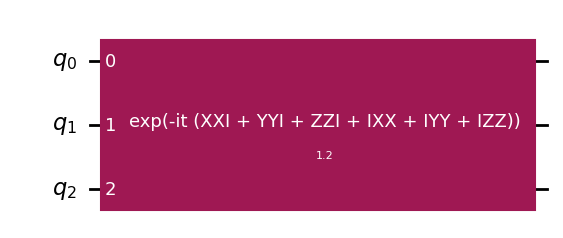

In [5]:
my_op = SparsePauliOp(["XXI", "YYI", "ZZI", "IXX", "IYY", "IZZ"])
paulievol = PauliEvolutionGate(my_op, time=1.2)
qc = QuantumCircuit(3)
qc.append(paulievol, [0, 1, 2])
qc.draw('mpl')

Running Cartan Synthesis Plugin...
Optimization terminated successfully.
         Current function value: -0.271988
         Iterations: 7
         Function evaluations: 10
         Gradient evaluations: 10
--- 0.017940044403076172 seconds ---
Optimization Error:
1.5683162228704474e-10


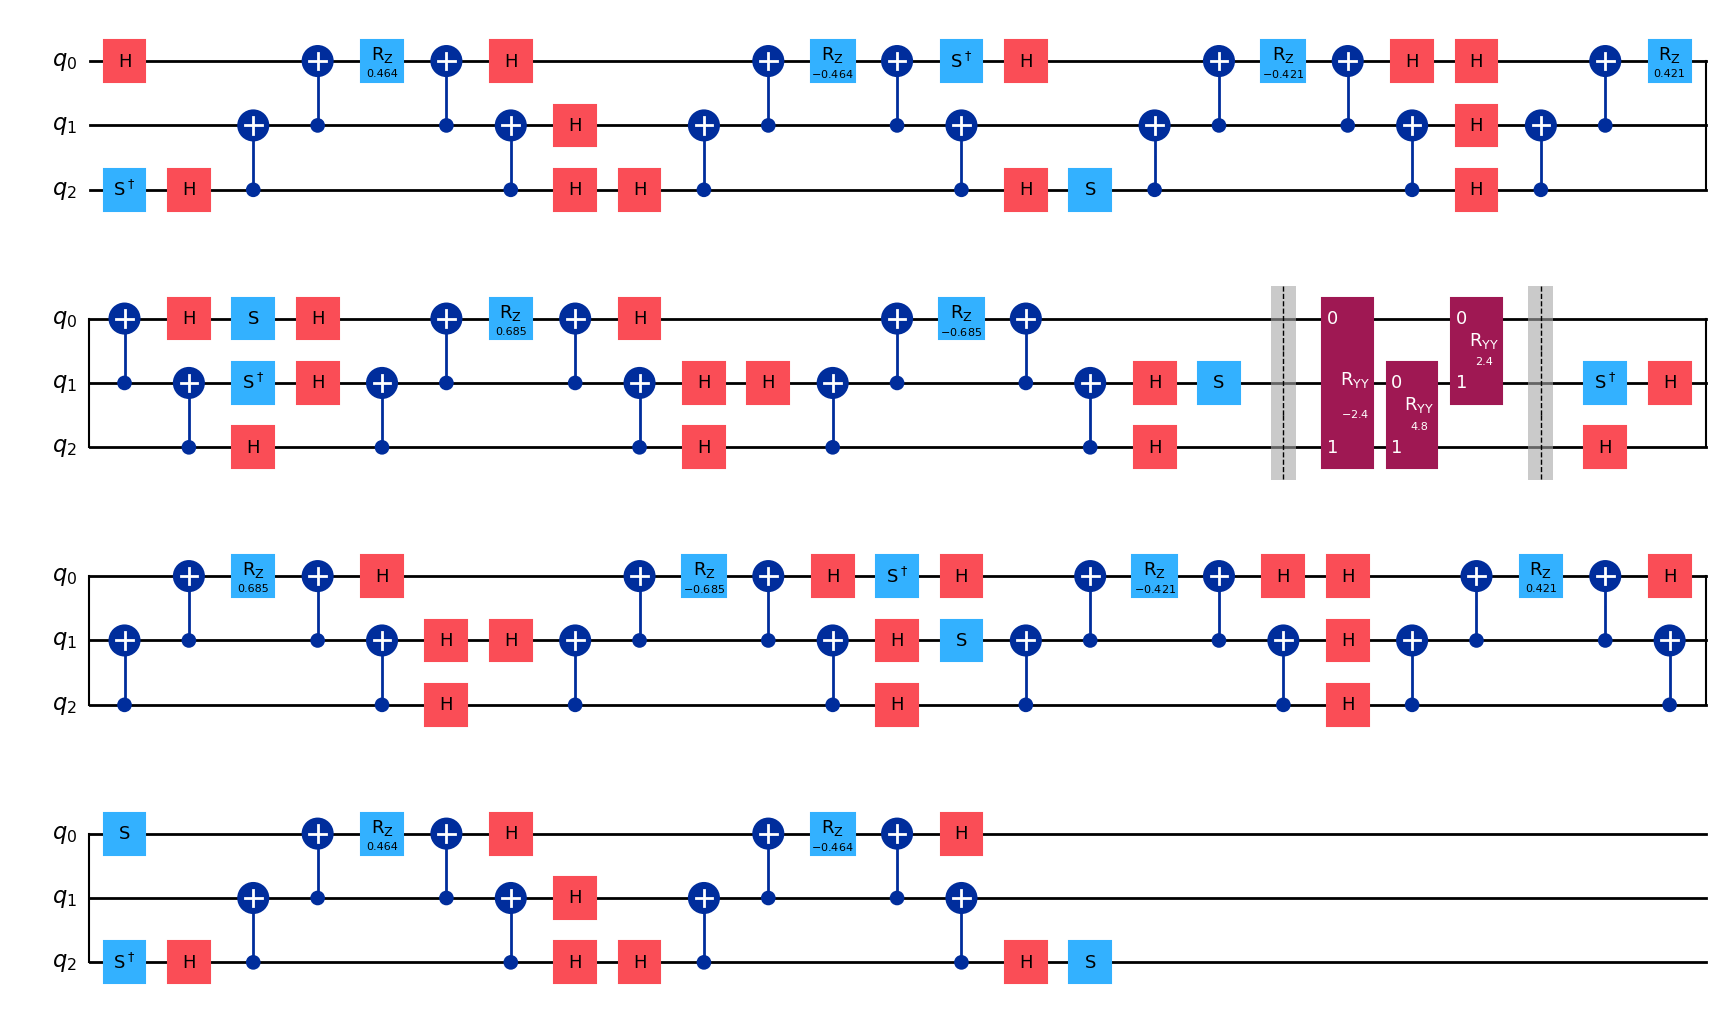

In [10]:
hls_config = HLSConfig(PauliEvolution=[("cartan", {"random_seed": 1, "involution":"evenOdd"})])
pm = generate_preset_pass_manager(3, hls_config=hls_config)
pm.init.run(qc).draw('mpl')